In [1]:
B = 3700
T0 = 298.15
R0 = 1

R1 = 0.992

In [2]:
import math

r0 = R0*math.exp(-B/T0)

def v_to_T(v):
    global B, r0, R1
    RT = R1*v/(1023-v)
    T = B / math.log(RT/r0) - 273.15
    return T

# Temperature vs. ADC value

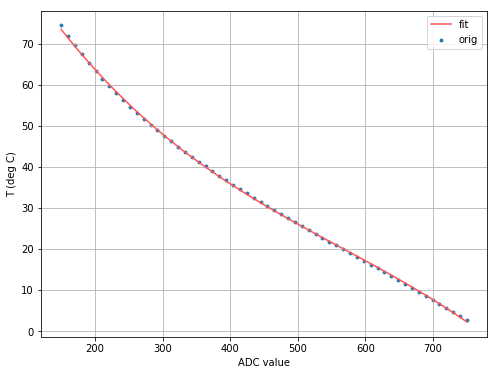

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

vs = np.linspace(150, 750, 60)
Ts = np.array([v_to_T(v) for v in vs])
ax.scatter(vs, Ts, 8, label='orig')

# fitting a 3rd-order polynomial
fit = np.polyfit(vs, Ts, 3)

f = np.poly1d(fit)
Ts_fit = f(vs)
ax.plot(vs, Ts_fit, label='fit', color='#ff5555')

ax.set(xlabel='ADC value', ylabel='T (deg C)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [4]:
order = len(fit) - 1
print('coefficients:')
for i, coeff in enumerate(fit):
    print('  a', order-i, ' = ', coeff, sep='')

coefficients:
  a3 = -2.36343234527e-07
  a2 = 0.000397783760403
  a1 = -0.31201993665
  a0 = 112.279223949


# Accuracy

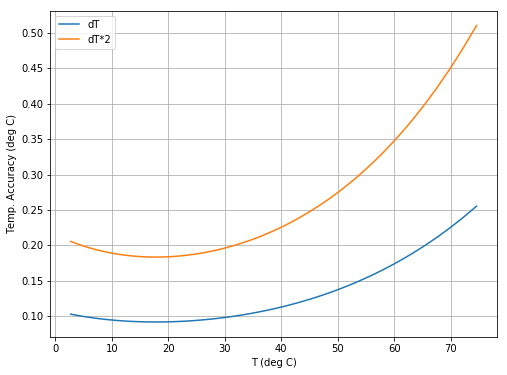

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

acc = np.array([v_to_T(v - 0.5) - v_to_T(v + 0.5)  for v in vs])

ax.plot(Ts, acc, label='dT')
ax.plot(Ts, acc*2, label='dT*2')
ax.set(xlabel='T (deg C)', ylabel='Temp. Accuracy (deg C)')
ax.set_yticks(np.linspace(0.1, 0.5, 9).tolist())
plt.grid()
plt.legend(loc='best')
plt.show()